In [35]:
import numpy as np
import librosa

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from IPython.display import Audio
from microphone import record_audio
from mygrad import sliding_window_view

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.morphology import iterate_structure

from typing import Tuple, Callable, List

%matplotlib notebook

In [36]:
def mp3_path_to_samples(path: str,*,duration = None, sampling_rate=44100) -> np.array:
    samples, sampling_rate = librosa.load(path, sr=sampling_rate, mono=True, duration=duration)
    return np.array(samples)

In [37]:
def microphone_audio_to_samples(listen_time=10):
    frames, sample_rate = record_audio(listen_time)
    np.frombuffer(frames[0],np.int16)
    samples = np.hstack([np.frombuffer(i, np.int16) for i in frames])
    return sample_rate, samples

In [38]:
# converting mp3 file to samples
# CHANGE FILE PATH
tiktok_samples = mp3_path_to_samples("/Users/koalum/Desktop/jpn - amend.mp3")

/opt/anaconda3/envs/week1/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [39]:
Audio(tiktok_samples, rate=44100)

In [40]:
# getting recording
sample_rate, samples = microphone_audio_to_samples(5)
Audio(samples, rate=sample_rate)

Using input device 'AirPods'
Recording ended


<IPython.core.display.Javascript object>


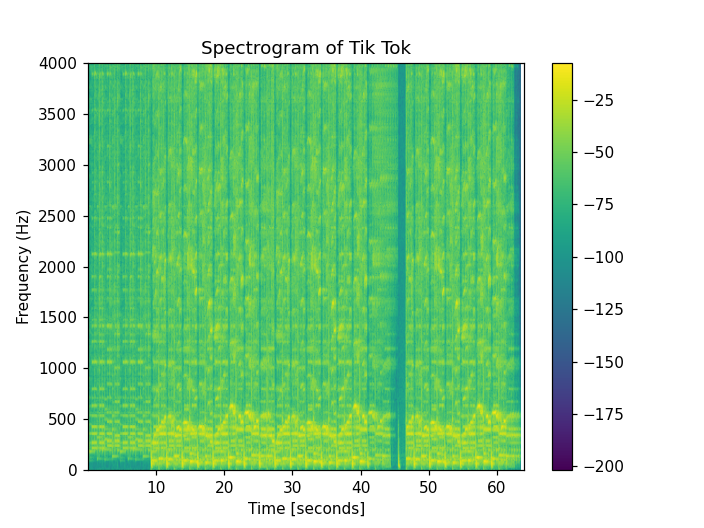

/opt/anaconda3/envs/week1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7555: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


In [41]:
max_freq = 4000  # the largest frequency that we want to plot

fig, ax = plt.subplots()

S, freqs, times, im = ax.specgram(
    tiktok_samples,
    NFFT=4096,
    Fs=44100,
    window=mlab.window_hanning,
    noverlap=4096 // 2,
    mode='magnitude',
    scale="dB"
)
fig.colorbar(im)

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Tik Tok")
ax.set_ylim(0, max_freq);

<IPython.core.display.Javascript object>


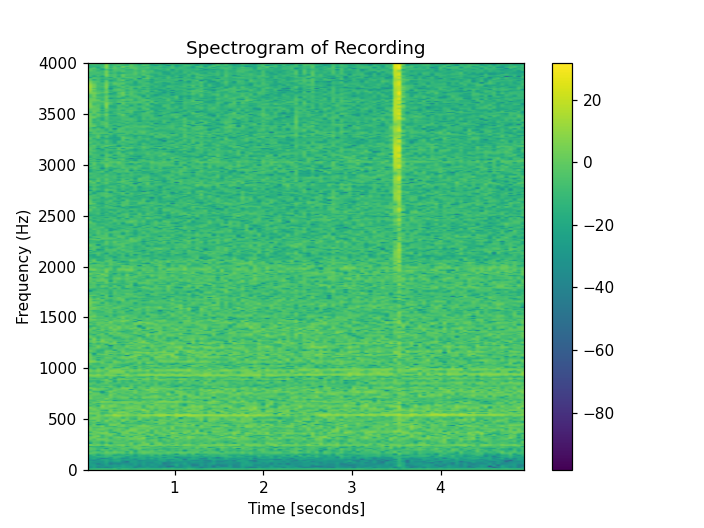

In [42]:
fig, ax = plt.subplots()

rec_S, rec_freqs, rec_times, im = ax.specgram(
    samples,
    NFFT=4096,
    Fs=sample_rate,
    window=mlab.window_hanning,
    noverlap=4096 // 2,
    mode='magnitude',
    scale="dB"
)
fig.colorbar(im)

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Recording")
ax.set_ylim(0, max_freq);

In [43]:
def ecdf(data):
    """Returns (x) the sorted data and (y) the empirical cumulative-proportion
    of each datum.
    
    Parameters
    ----------
    data : numpy.ndarray, size-N
    
    Returns
    -------
    Tuple[numpy.ndarray shape-(N,), numpy.ndarray shape-(N,)]
        Sorted data, empirical CDF values"""
    data = np.asarray(data).ravel()  # flattens the data
    y = np.linspace(1 / len(data), 1, len(data))  # stores the cumulative proportion associated with each sorted datum
    x = np.sort(data)
    return x, y

<IPython.core.display.Javascript object>


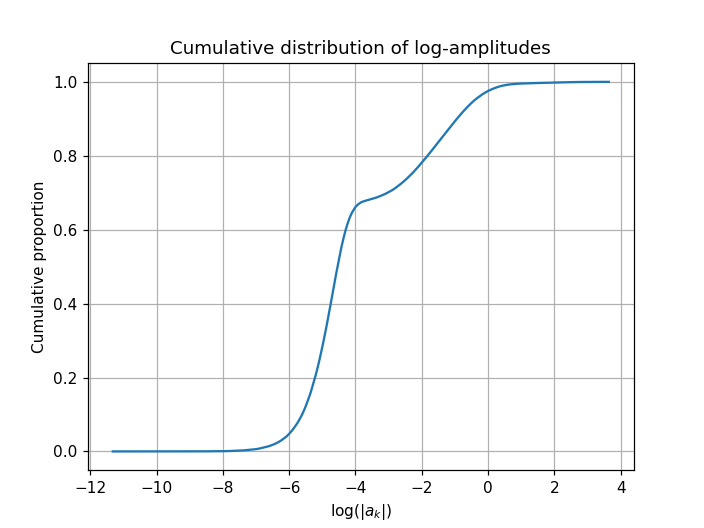

In [44]:
fig, ax = plt.subplots()

x, y = ecdf(np.log(rec_S))
ax.plot(x, y)

ax.set_xlabel(r"$\log(|a_{k}|)$")
ax.set_ylabel(r"Cumulative proportion")
ax.set_title("Cumulative distribution of log-amplitudes")
ax.grid(True)

In [45]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [46]:
def compute_cutoff(S):
    proportion = y[find_nearest(x, 0)]
    log_S = np.log(S).ravel()  # flattened array
    ind = int(round(len(log_S) * proportion))
    cutoff_log_amplitude = np.partition(log_S, ind)[ind]
    return cutoff_log_amplitude

In [53]:
song_path = "/Users/koalum/Desktop/jpn - amend.mp3"
sampling_rate = 44100
recorded_audio = mp3_path_to_samples(song_path)

S, freqs, times = mlab.specgram(
    recorded_audio,
    NFFT=4096,
    Fs=sampling_rate,
    window=mlab.window_hanning,
    noverlap=4096 // 2,
)

peaks = local_peaks_mask(S, cutoff = np.percentile(S, 75))
create_fingerprints(peaks, 15)


/opt/anaconda3/envs/week1/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[((528, 361, 8), 12),
 ((528, 393, 8), 12),
 ((528, 433, 8), 12),
 ((528, 467, 8), 12),
 ((528, 496, 8), 12),
 ((528, 584, 8), 12),
 ((528, 98, 9), 12),
 ((528, 329, 10), 12),
 ((528, 196, 25), 12),
 ((528, 153, 32), 12),
 ((528, 224, 32), 12),
 ((528, 275, 32), 12),
 ((528, 308, 32), 12),
 ((528, 329, 32), 12),
 ((528, 434, 32), 12),
 ((361, 393, 0), 20),
 ((361, 433, 0), 20),
 ((361, 467, 0), 20),
 ((361, 496, 0), 20),
 ((361, 584, 0), 20),
 ((361, 98, 1), 20),
 ((361, 329, 2), 20),
 ((361, 196, 17), 20),
 ((361, 153, 24), 20),
 ((361, 224, 24), 20),
 ((361, 275, 24), 20),
 ((361, 308, 24), 20),
 ((361, 329, 24), 20),
 ((361, 434, 24), 20),
 ((361, 480, 24), 20),
 ((393, 433, 0), 20),
 ((393, 467, 0), 20),
 ((393, 496, 0), 20),
 ((393, 584, 0), 20),
 ((393, 98, 1), 20),
 ((393, 329, 2), 20),
 ((393, 196, 17), 20),
 ((393, 153, 24), 20),
 ((393, 224, 24), 20),
 ((393, 275, 24), 20),
 ((393, 308, 24), 20),
 ((393, 329, 24), 20),
 ((393, 434, 24), 20),
 ((393, 480, 24), 20),
 ((393, 551

In [54]:
from numba import njit
@njit

def _peaks(
    data_2d: np.ndarray, rows: np.ndarray, cols: np.ndarray, amp_min: float
) -> List[Tuple[int, int]]:
    
    peaks = []
    for c, r in np.ndindex(*data_2d.shape[::-1]):
        if data_2d[r, c] <= amp_min:
            continue
        for dr, dc in zip(rows, cols):
            if dr == 0 and dc == 0:
                continue
            if not (0 <= r + dr < data_2d.shape[0]):
                continue
            if not (0 <= c + dc < data_2d.shape[1]):
                continue

            if data_2d[r, c] < data_2d[r + dr, c + dc]:
                break
        else:
            peaks.append((r, c))
    return peaks

def local_peak_locations(data_2d: np.ndarray, neighborhood: np.ndarray, amp_min: float):
    rows, cols = np.where(neighborhood)
    assert neighborhood.shape[0] % 2 == 1
    assert neighborhood.shape[1] % 2 == 1
    rows -= neighborhood.shape[0] // 2
    cols -= neighborhood.shape[1] // 2

    return _peaks(data_2d, rows, cols, amp_min=amp_min)

def local_peaks_mask(data: np.ndarray, cutoff: float) -> np.ndarray:
    neighborhood_mask = generate_binary_structure(2, 1) #footprint
    neighborhood_mask = iterate_structure(neighborhood_mask, 20)
    peak_locations = local_peak_locations(data, neighborhood_mask, cutoff)

    peak_locations = np.array(peak_locations)

    return peak_locations

In [55]:
rec_peaks = local_peaks_mask(rec_S, cutoff=compute_cutoff(rec_S))
len(rec_peaks)

237

<IPython.core.display.Javascript object>


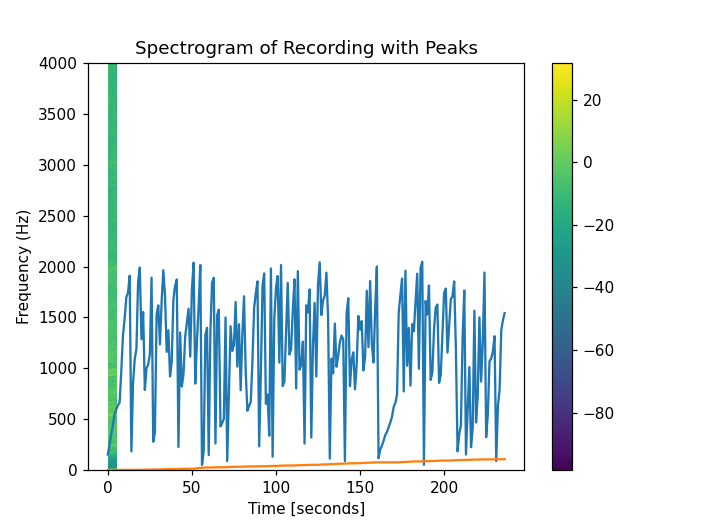

In [56]:
fig, ax = plt.subplots()

ax.plot(rec_peaks)

ax.specgram(
    samples,
    NFFT=4096,
    Fs=sample_rate,
    window=mlab.window_hanning,
    noverlap=4096 // 2,
    mode='magnitude',
    scale="dB"
)
fig.colorbar(im)

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Recording with Peaks")
ax.set_ylim(0, max_freq);

In [57]:
import numpy as np

def create_fingerprints(peaks, fanout):
    rows = [] # frequency
    columns = [] # time
    fingerprints = []
    database = {}
    names = []

    for r, c in peaks: # split the peaks into 2 list containing rows and columns
        rows.append(r)
        columns.append(c)  
                       
    for i in range(0, len(peaks) - 1):
        for n in range(1, fanout + 1):
            if i + n < len(peaks):
                fingerprints.append(((rows[i], rows[i + n], columns[i + n] - columns[i]), columns[i]))
            else:
                break
                
    return fingerprints